# Introduction

In today's competitive global market, understanding customer behavior is vital for businesses to thrive. One significant aspect of customer behavior is their decision to make deposits. By effectively assessing customers' traits, we can gain insights into their likelihood of engaging in deposit activities. This project aims to utilize machine learning techniques and exploratory data analysis to predict whether customers will deposit or not based on their information.

# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\\Users\\Thai Hoang\\OneDrive\\Tài liệu\\Marketing bank.csv')

# Get to know the data

In [2]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


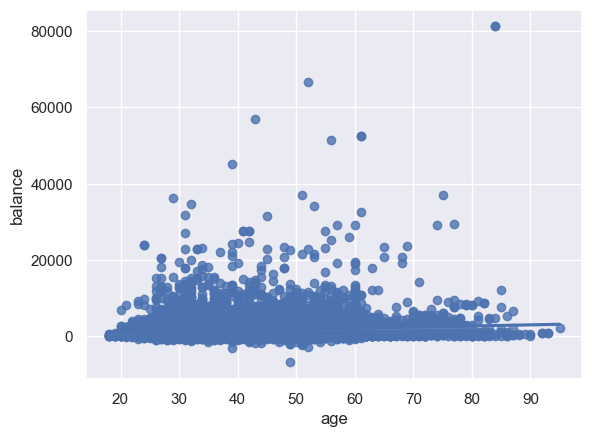

In [55]:
g = sns.regplot(data = df, x= 'age', y= 'balance')

In [56]:
print(type(g))

<class 'matplotlib.axes._axes.Axes'>


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
df.shape

(11162, 17)

In [8]:
miss_value = df.isnull().sum()
miss_value

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

The data has no missing value

# EDA

## Objects colums

In [9]:
object_columns = df.select_dtypes(include='object')
for column in object_columns:
    print(column)


job
marital
education
default
housing
loan
contact
month
poutcome
deposit


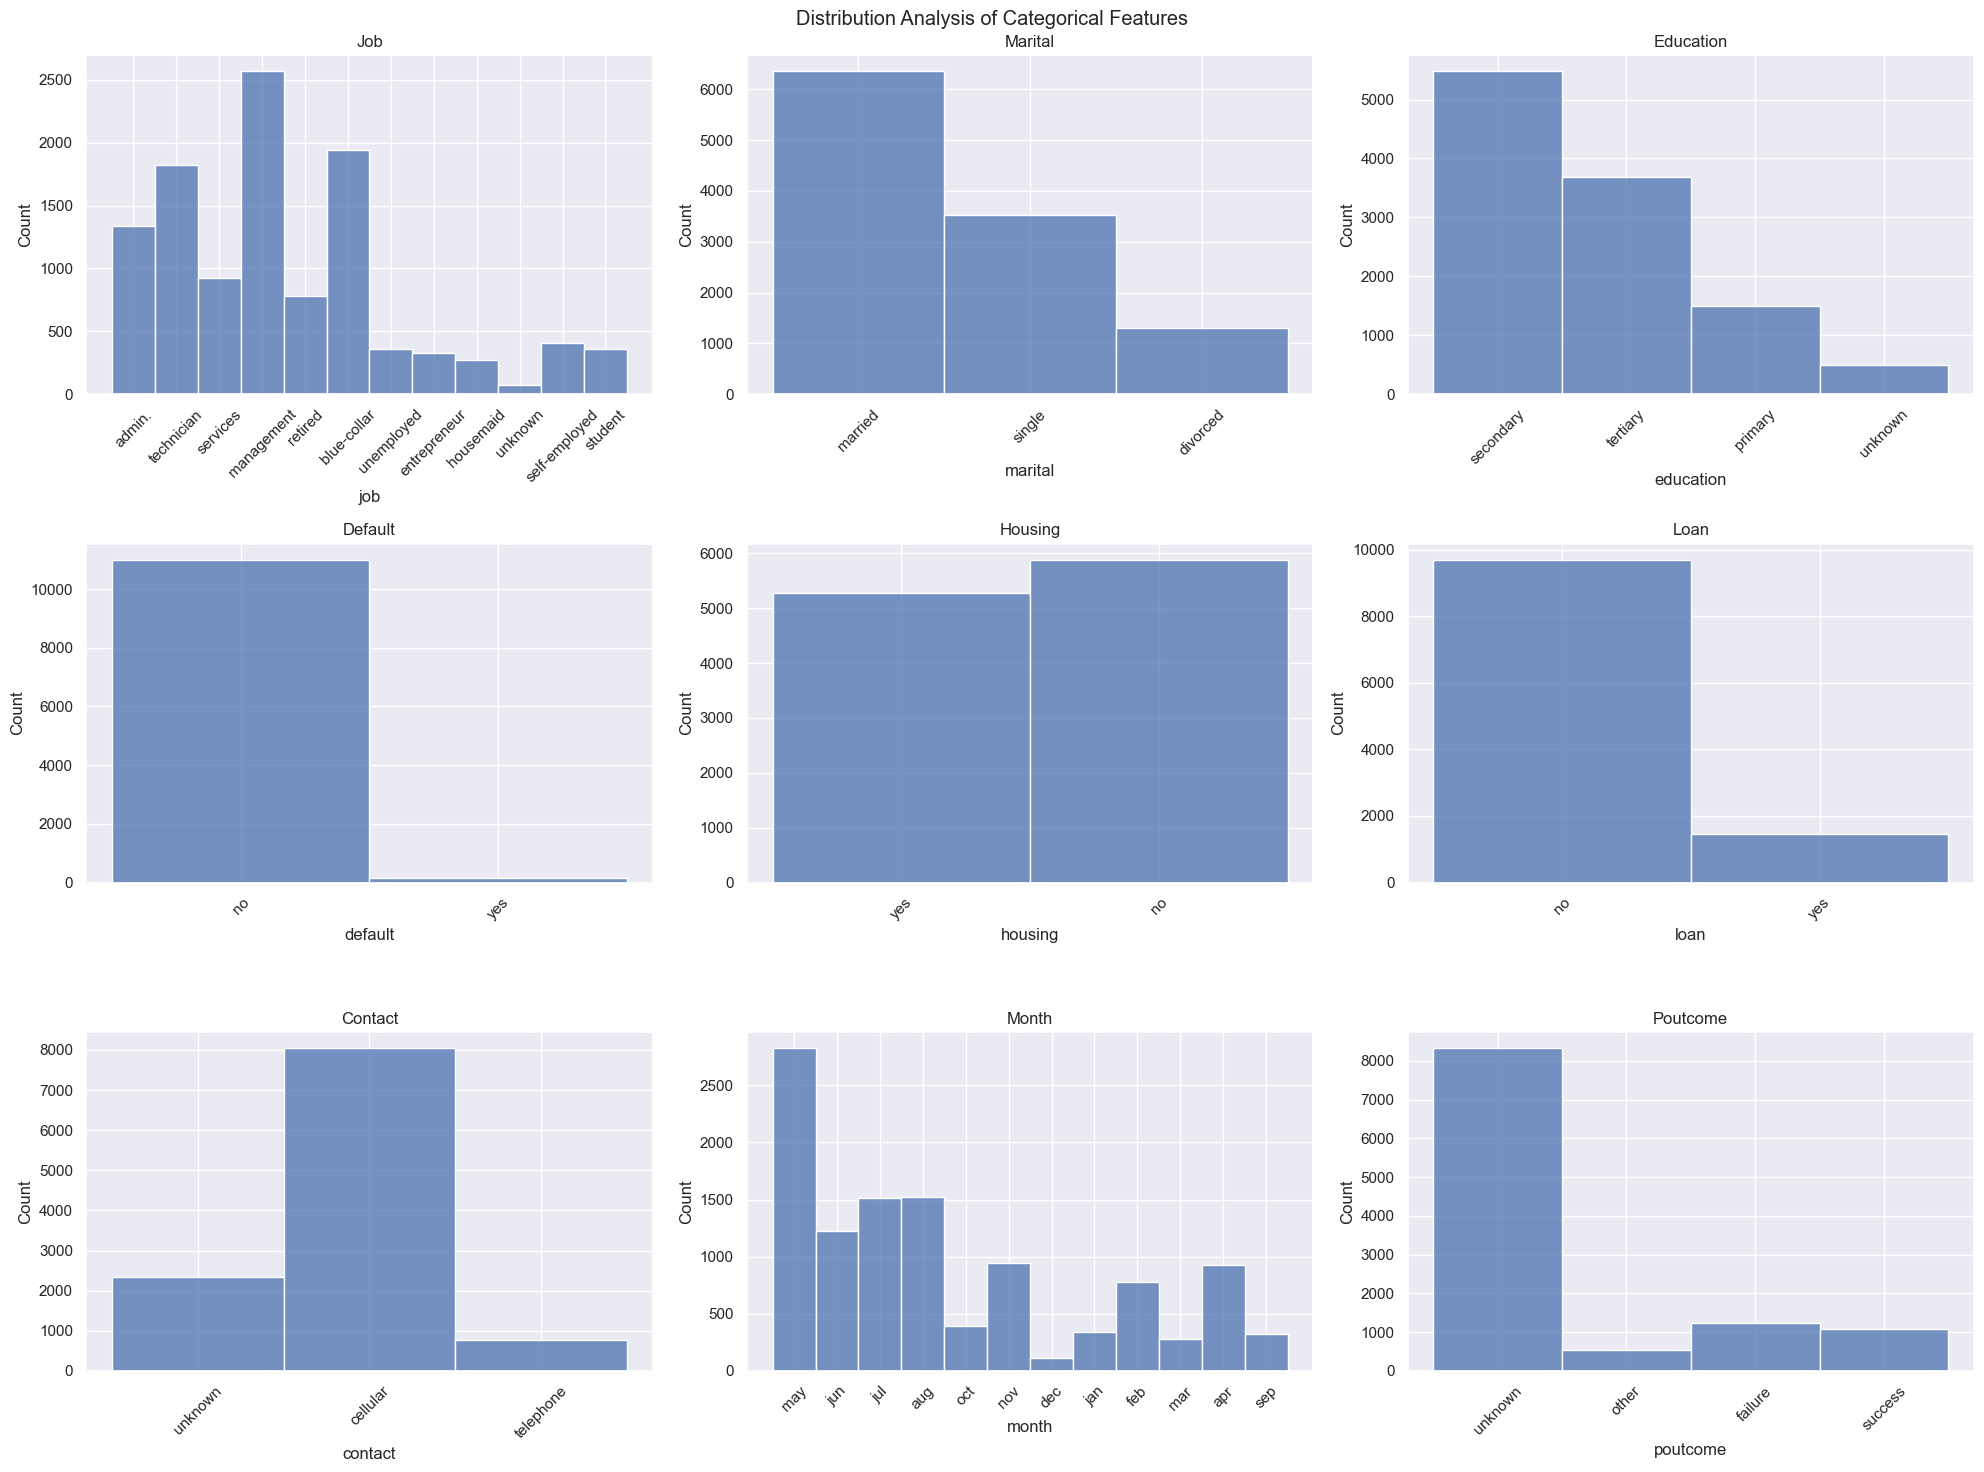

In [10]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]  
    sns.histplot(data=df, x=feature, ax=ax)
    ax.set_title(f'{feature.capitalize()}')
    ax.tick_params(axis='x', rotation=45) 

fig.suptitle('Distribution Analysis of Categorical Features')
plt.tight_layout()

plt.show()


We have generated a bar chart for the following categories: "job, marital, education, default, housing, loan, contact, month, poutcome, deposit" to gain a comprehensive overview of the data. As a result, we could inferred several insights such as the profession of management is the most prevalent among the clients, and a significant portion of the customer base is comprised of married individuals, among other findings.

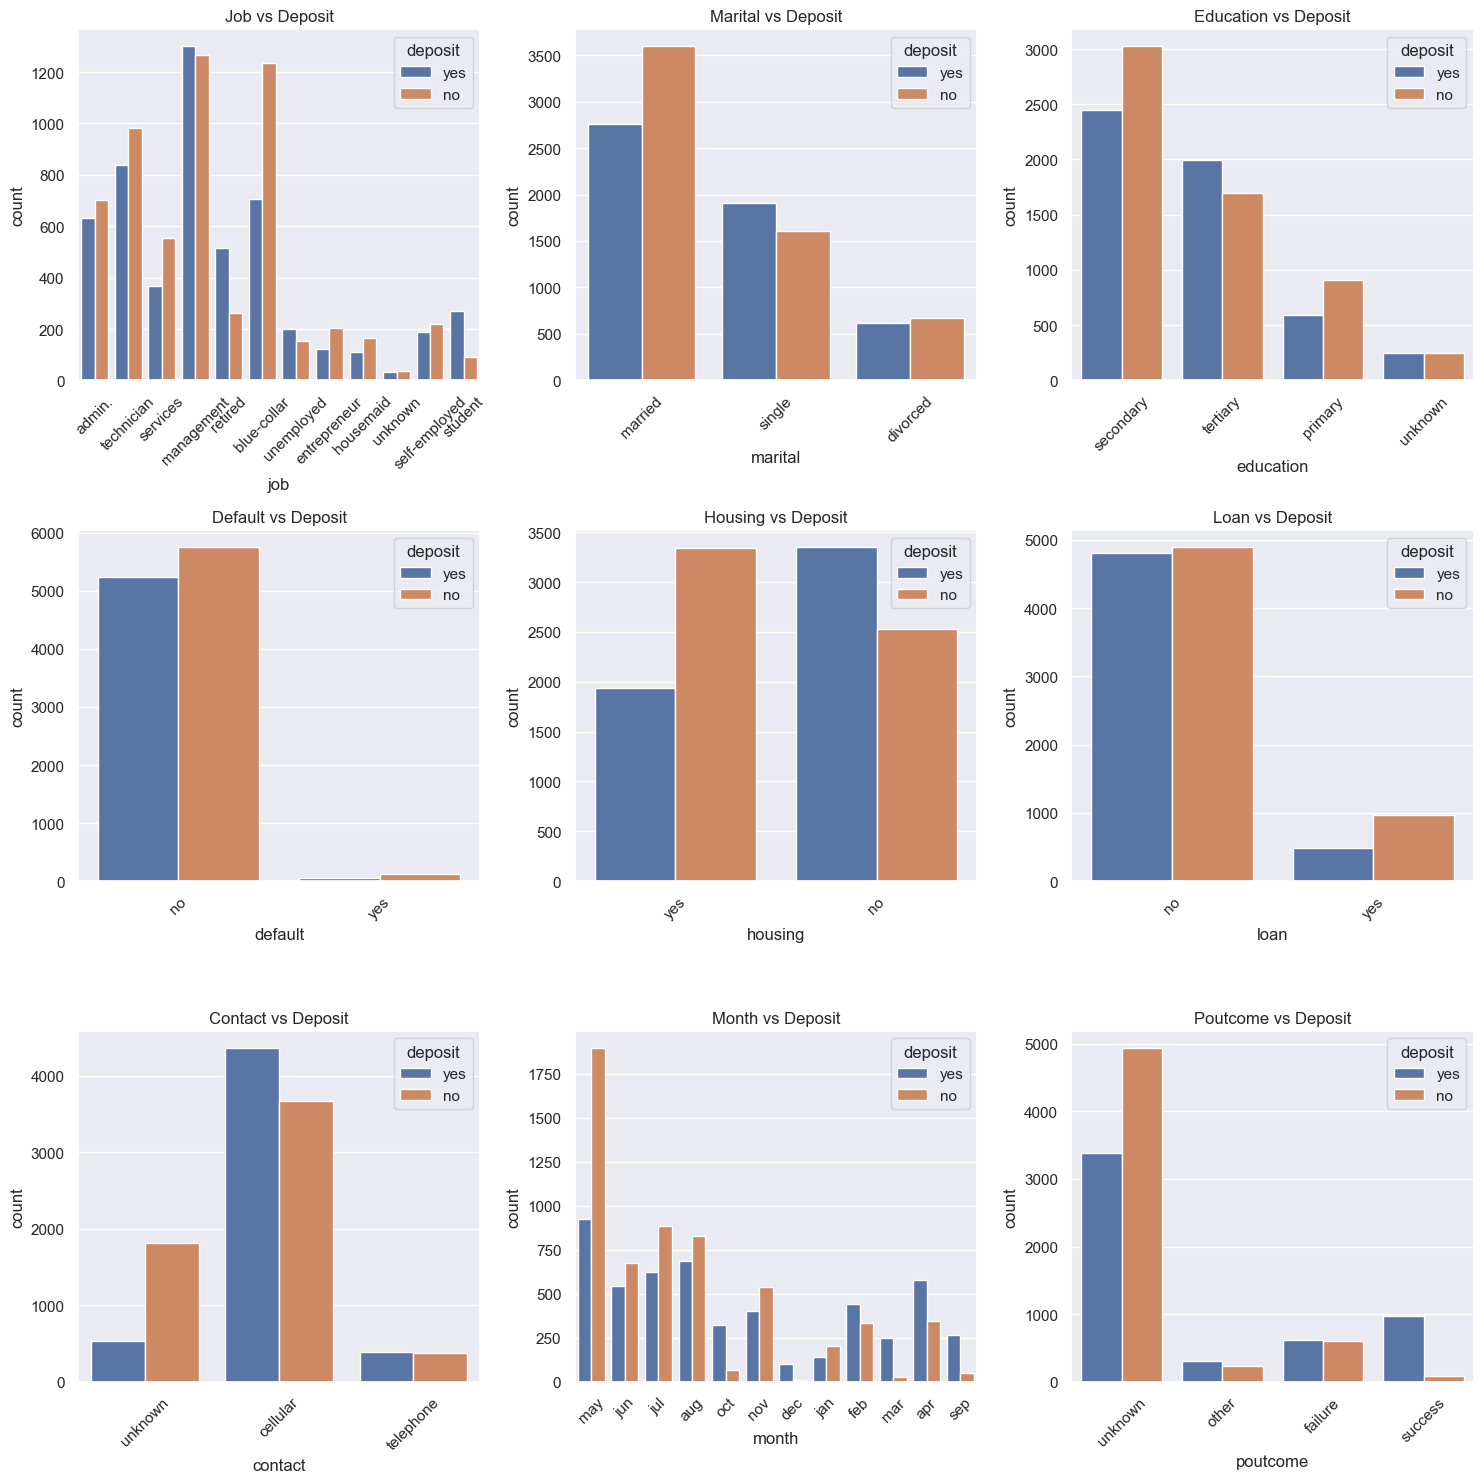

In [11]:
object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(15, 15)) 

for i, column in enumerate(object_columns):
    row = i // 3
    col = i % 3

    sns.countplot(data=df, x=column, ax=axes[row, col], hue='deposit')
    axes[row, col].set_title(f'{column.capitalize()} vs Deposit')
    axes[row, col].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()

Furthermore, we conducted a thorough analysis between the aforementioned categories and the propensity to make a deposit. This involved the creation of a visual representation in the form of a bar chart, with two distinct columns denoting "deposit" and "no deposit," enabling a comprehensive examination of the relationship between each category and the deposit behavior.

## Interger 

In [12]:
int_columns = df.select_dtypes(include='integer')
for column in int_columns:
    print(column)

age
balance
day
duration
campaign
pdays
previous


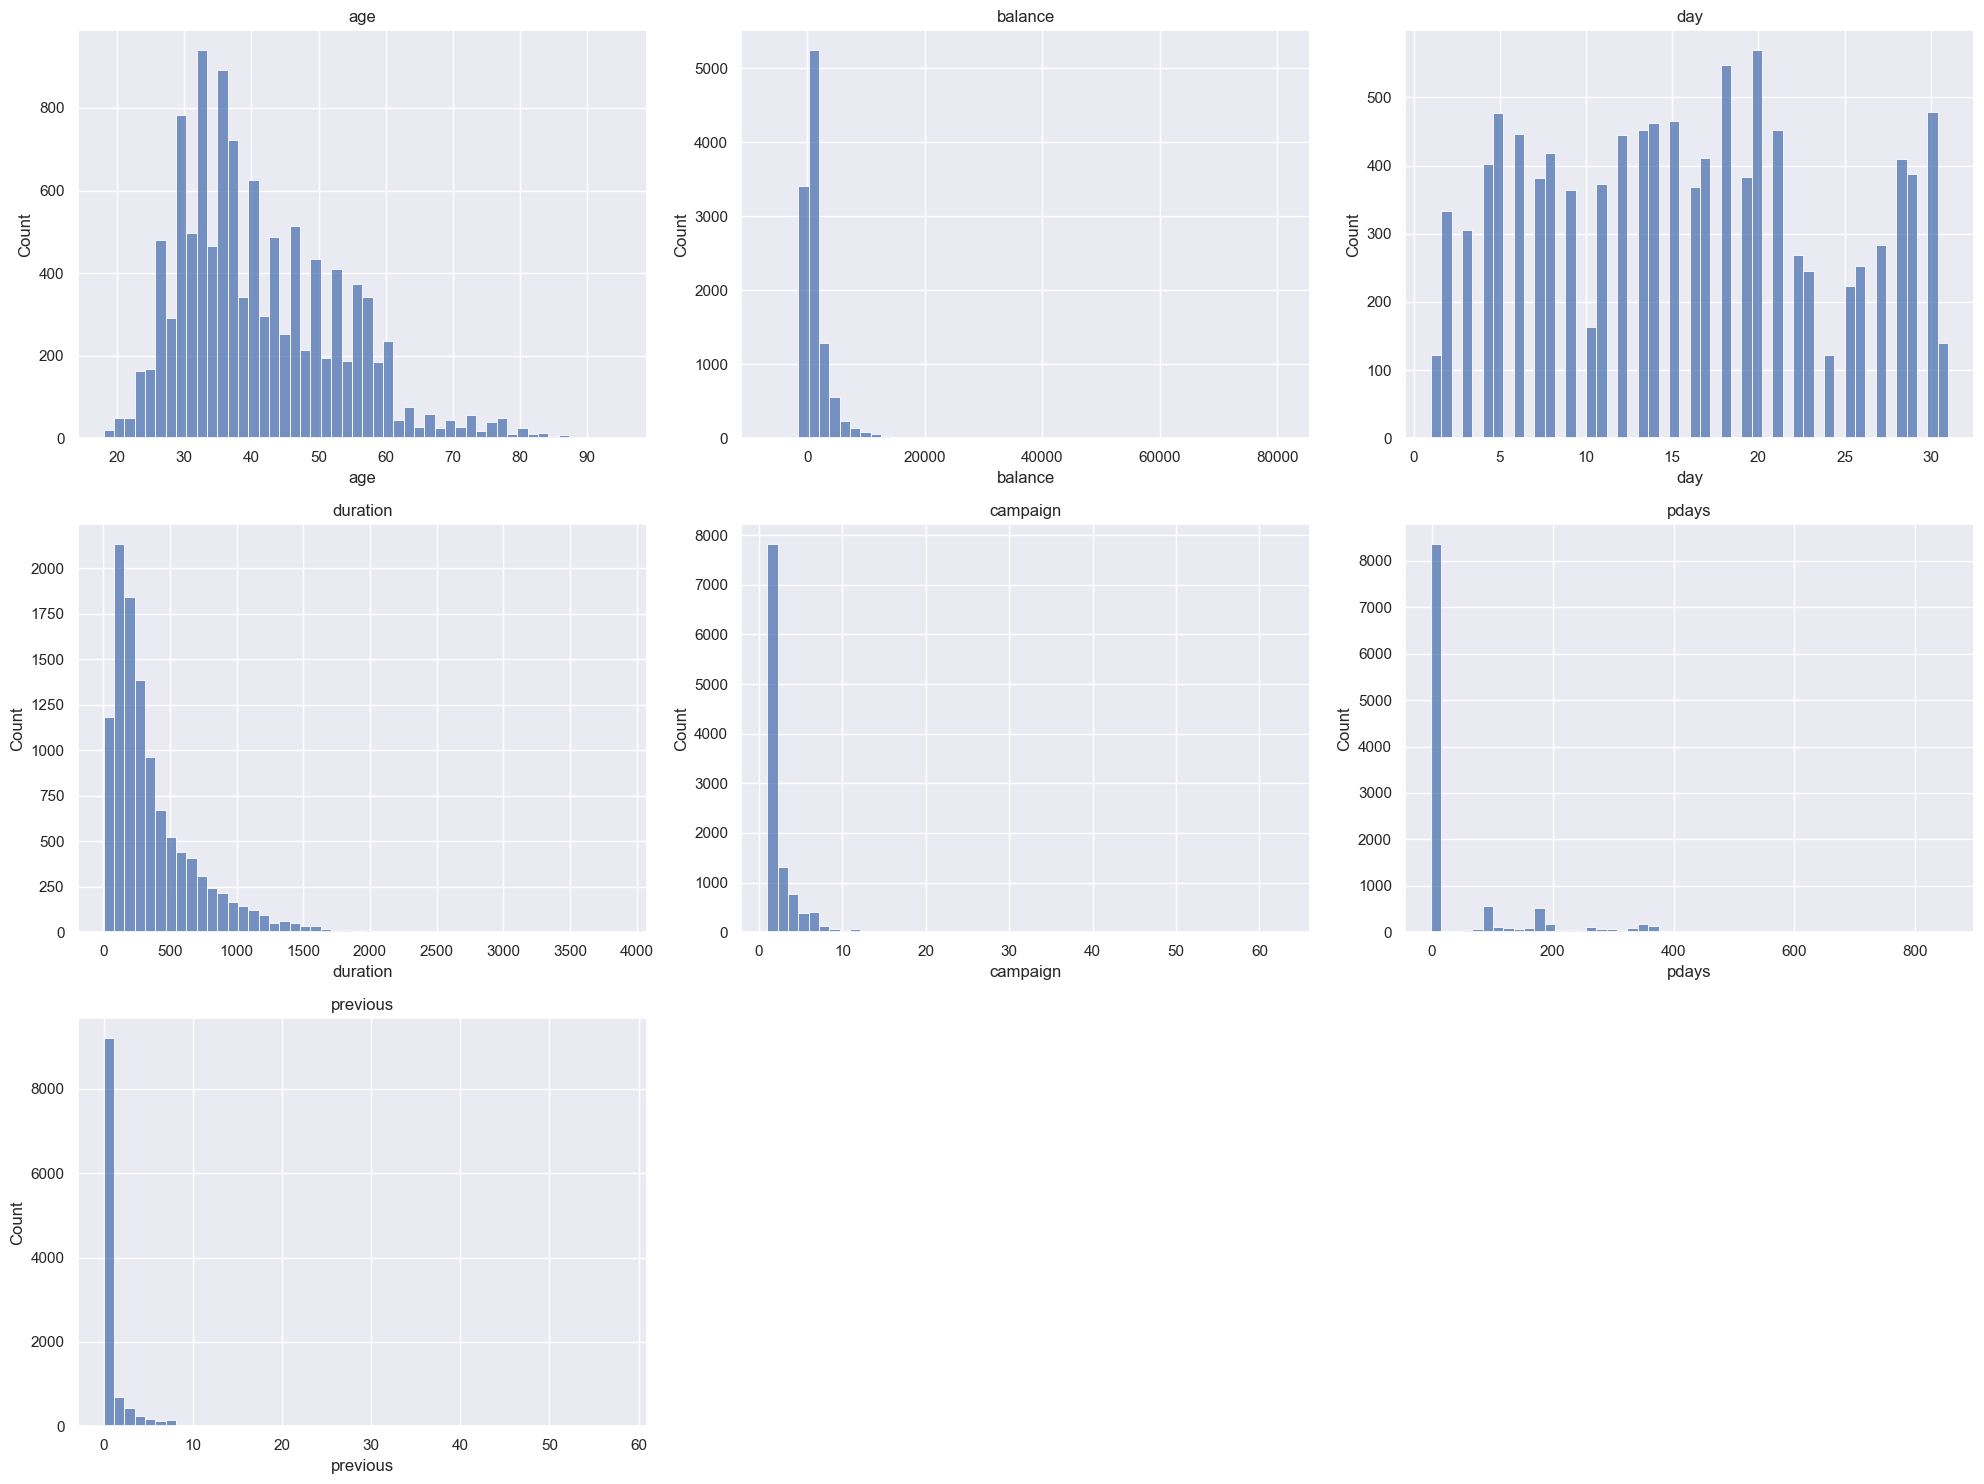

In [13]:
categorical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3

    sns.histplot(data=df, x=feature, ax=axes[row, col], bins=50)
    axes[row, col].set_title(f"{feature}")

axes[2, 1].remove()
axes[2, 2].remove()
plt.tight_layout()
plt.show()

The histogram above illustrates the distribution of various numerical data points, including "age," "balance," "day," "duration," "campaign," "pdays," and "previous." Consequently, we can derive valuable insights, such as the prevalence of customers within the 30-40 age range and the predominant call duration for a substantial proportion of clients, which centers around approximately 200 seconds.

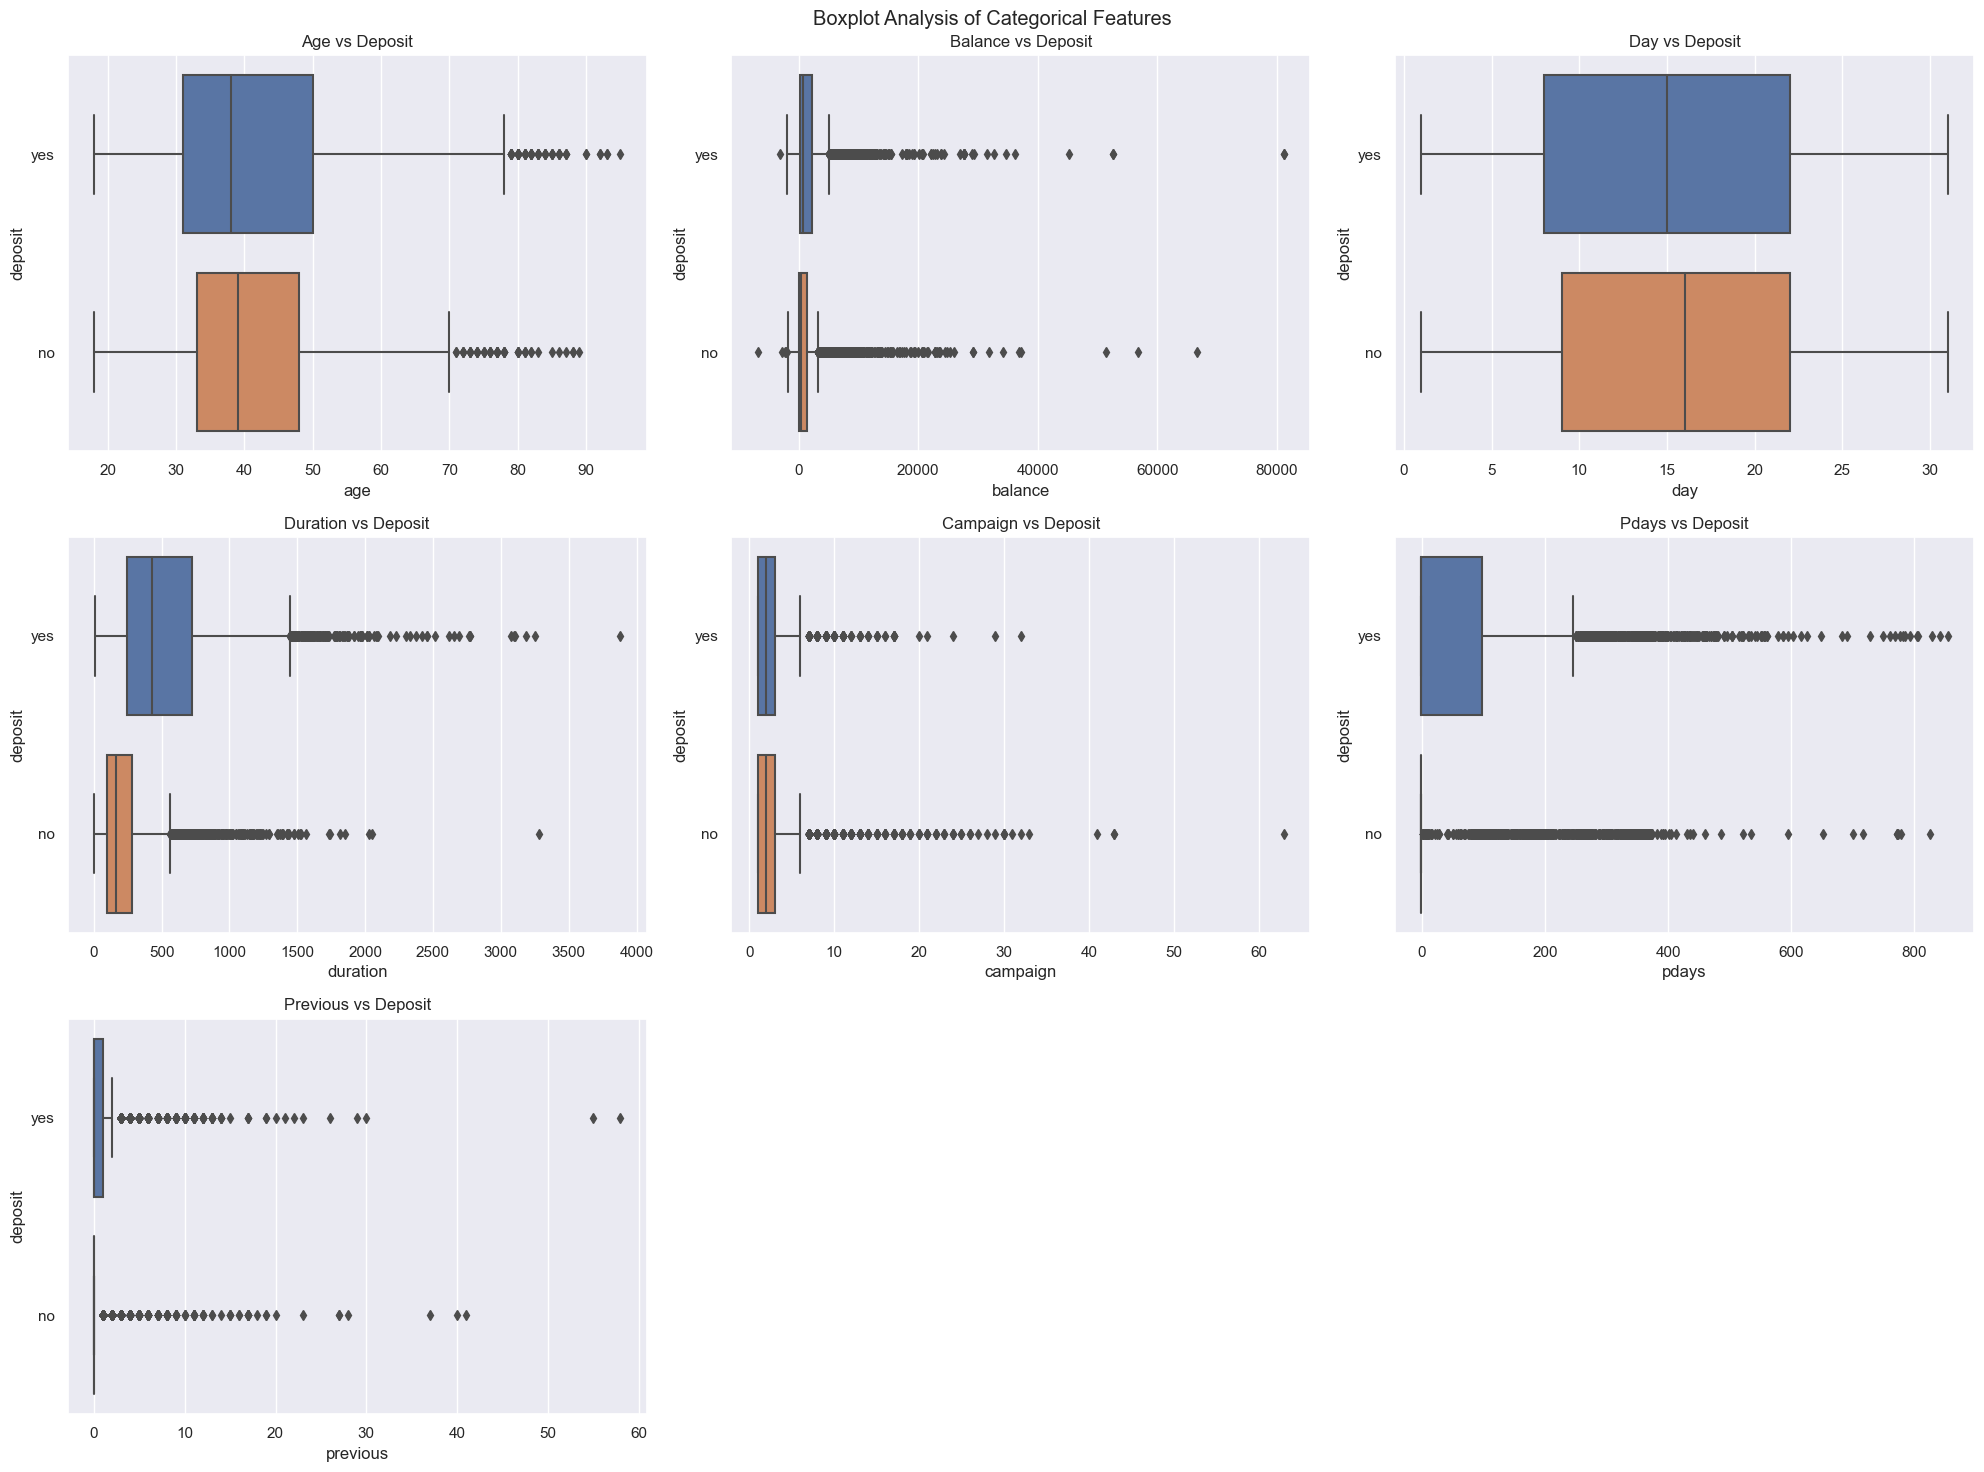

In [14]:
sns.set(style='darkgrid')
fig, graph = plt.subplots(3, 3, figsize=(20, 15))
categorical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = graph[row, col]
    sns.boxplot(data=df, x=feature, y='deposit', ax=ax)
    ax.set_title(f'{feature.capitalize()} vs Deposit')
fig.suptitle('Boxplot Analysis of Categorical Features')
graph[2, 1].remove()
graph[2, 2].remove()
plt.tight_layout()
plt.show()

We also conducted a box plot analysis for the aforementioned variables to identify the minimum, maximum, first quartile, median, third quartile, and any outliers present within these datasets.

# Transform columns

## Balance

In [15]:
pd.qcut(df['balance'], 4)

0         (1708.0, 81204.0]
1        (-6847.001, 122.0]
2           (550.0, 1708.0]
3         (1708.0, 81204.0]
4            (122.0, 550.0]
                ...        
11157    (-6847.001, 122.0]
11158       (550.0, 1708.0]
11159    (-6847.001, 122.0]
11160    (-6847.001, 122.0]
11161    (-6847.001, 122.0]
Name: balance, Length: 11162, dtype: category
Categories (4, interval[float64, right]): [(-6847.001, 122.0] < (122.0, 550.0] < (550.0, 1708.0] < (1708.0, 81204.0]]

In [16]:
balance_categories = ['low', 'medium low','medium', 'high']
quartile_balance = pd.qcut(df['balance'], 4, labels = balance_categories )
quartile_balance

0              high
1               low
2            medium
3              high
4        medium low
            ...    
11157           low
11158        medium
11159           low
11160           low
11161           low
Name: balance, Length: 11162, dtype: category
Categories (4, object): ['low' < 'medium low' < 'medium' < 'high']

Devide the "balance" columns into 4 smaller categories for easier visualization and analysis

<Axes: xlabel='balance', ylabel='count'>

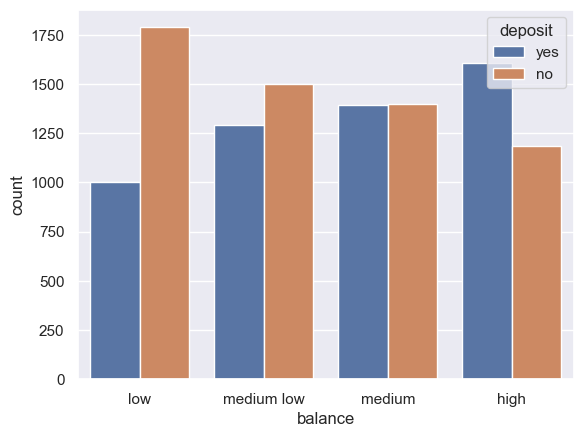

In [17]:
sns.countplot(x = quartile_balance, hue = df['deposit'])

As the balance increases, the probability of depositing also increases.

## Duration

In [18]:
df['duration'] =df['duration'].apply(lambda n:n/60).round(2)

In [19]:
pd.qcut(df['duration'], 4)

0                      (8.27, 64.68]
1                      (8.27, 64.68]
2                      (8.27, 64.68]
3                      (8.27, 64.68]
4                      (8.27, 64.68]
                    ...             
11157                   (4.25, 8.27]
11158    (0.028999999999999998, 2.3]
11159                    (2.3, 4.25]
11160    (0.028999999999999998, 2.3]
11161                  (8.27, 64.68]
Name: duration, Length: 11162, dtype: category
Categories (4, interval[float64, right]): [(0.028999999999999998, 2.3] < (2.3, 4.25] < (4.25, 8.27] < (8.27, 64.68]]

In [20]:
duration_categories = ['very short', 'short', 'medium', 'long']
quartile_duration  = pd.qcut(df['balance'], 4, labels = duration_categories )
quartile_duration 

0              long
1        very short
2            medium
3              long
4             short
            ...    
11157    very short
11158        medium
11159    very short
11160    very short
11161    very short
Name: balance, Length: 11162, dtype: category
Categories (4, object): ['very short' < 'short' < 'medium' < 'long']

Devide the "duration" columns into 4 smaller categories for easier visualization and analysis

<Axes: xlabel='balance', ylabel='count'>

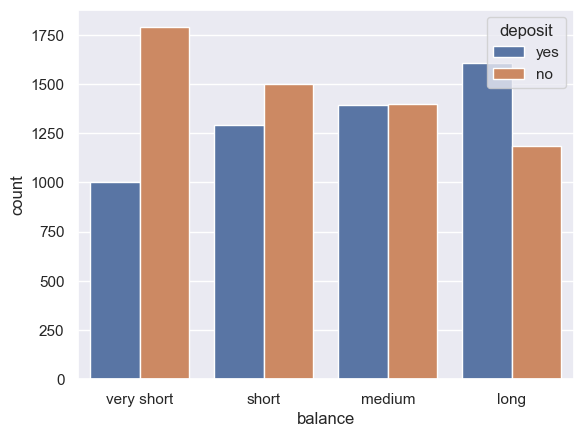

In [21]:
sns.countplot(x = quartile_duration , hue = df['deposit'])

The duration of contact with the client is positively correlated with the likelihood of their depositing. 

# Correlations

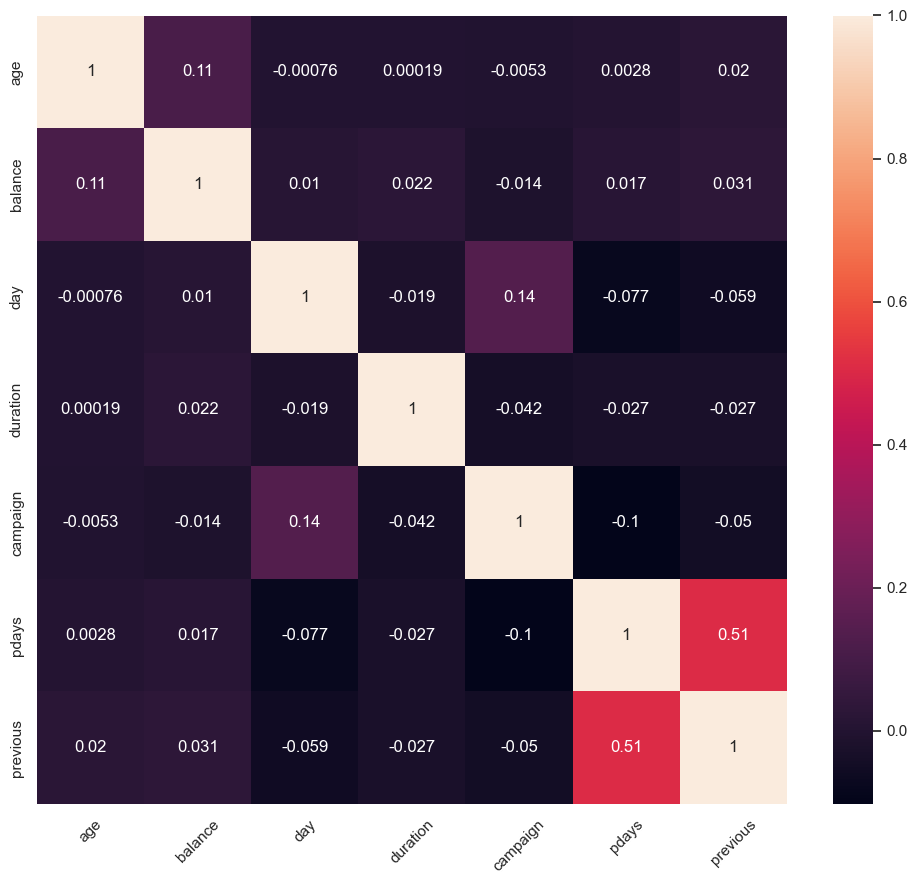

In [22]:
plt.figure(figsize=(10, 9))
heatmap = sns.heatmap(df.corr(numeric_only = True),annot =True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

- As shown in the heatmap, except for "pdays" and "previous", other variables have almost no correlation (as their correlation coefficient are around 0)
- The correlation coefficient of "pdays" and "previous" are 0.51. It might indicate that it may indicate that the result of previous campaigns has a litthe influence on the number of contacts performed for the current campaign.

# Preprocessing

## Drop columns

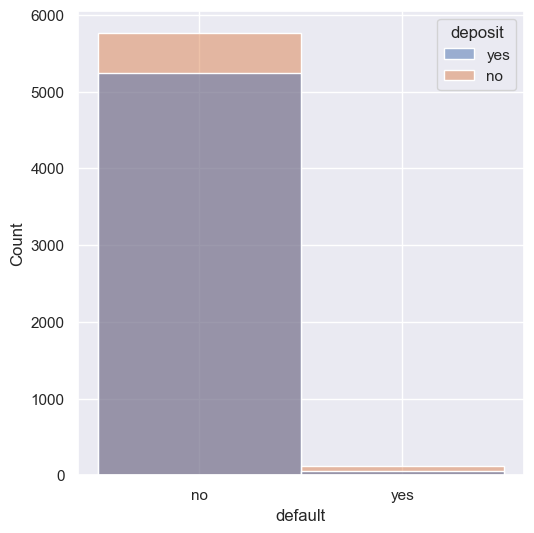

In [23]:
default_hist = plt.figure(figsize=(5.5, 5.5))
sns.histplot(data=df, x='default', bins=50, hue='deposit')

plt.tight_layout()
plt.show()

In [24]:
df.groupby(['deposit', 'default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

As can be seen in the graph and statistics above, the value "No" in "default" account for almost 98,5%. This means the "default" columns has very little impact on the "deposit". So this column is dropped

In [25]:
x = df.drop('default', axis=1) 

## Remove outliers

### Duration, Campaign and Pdays

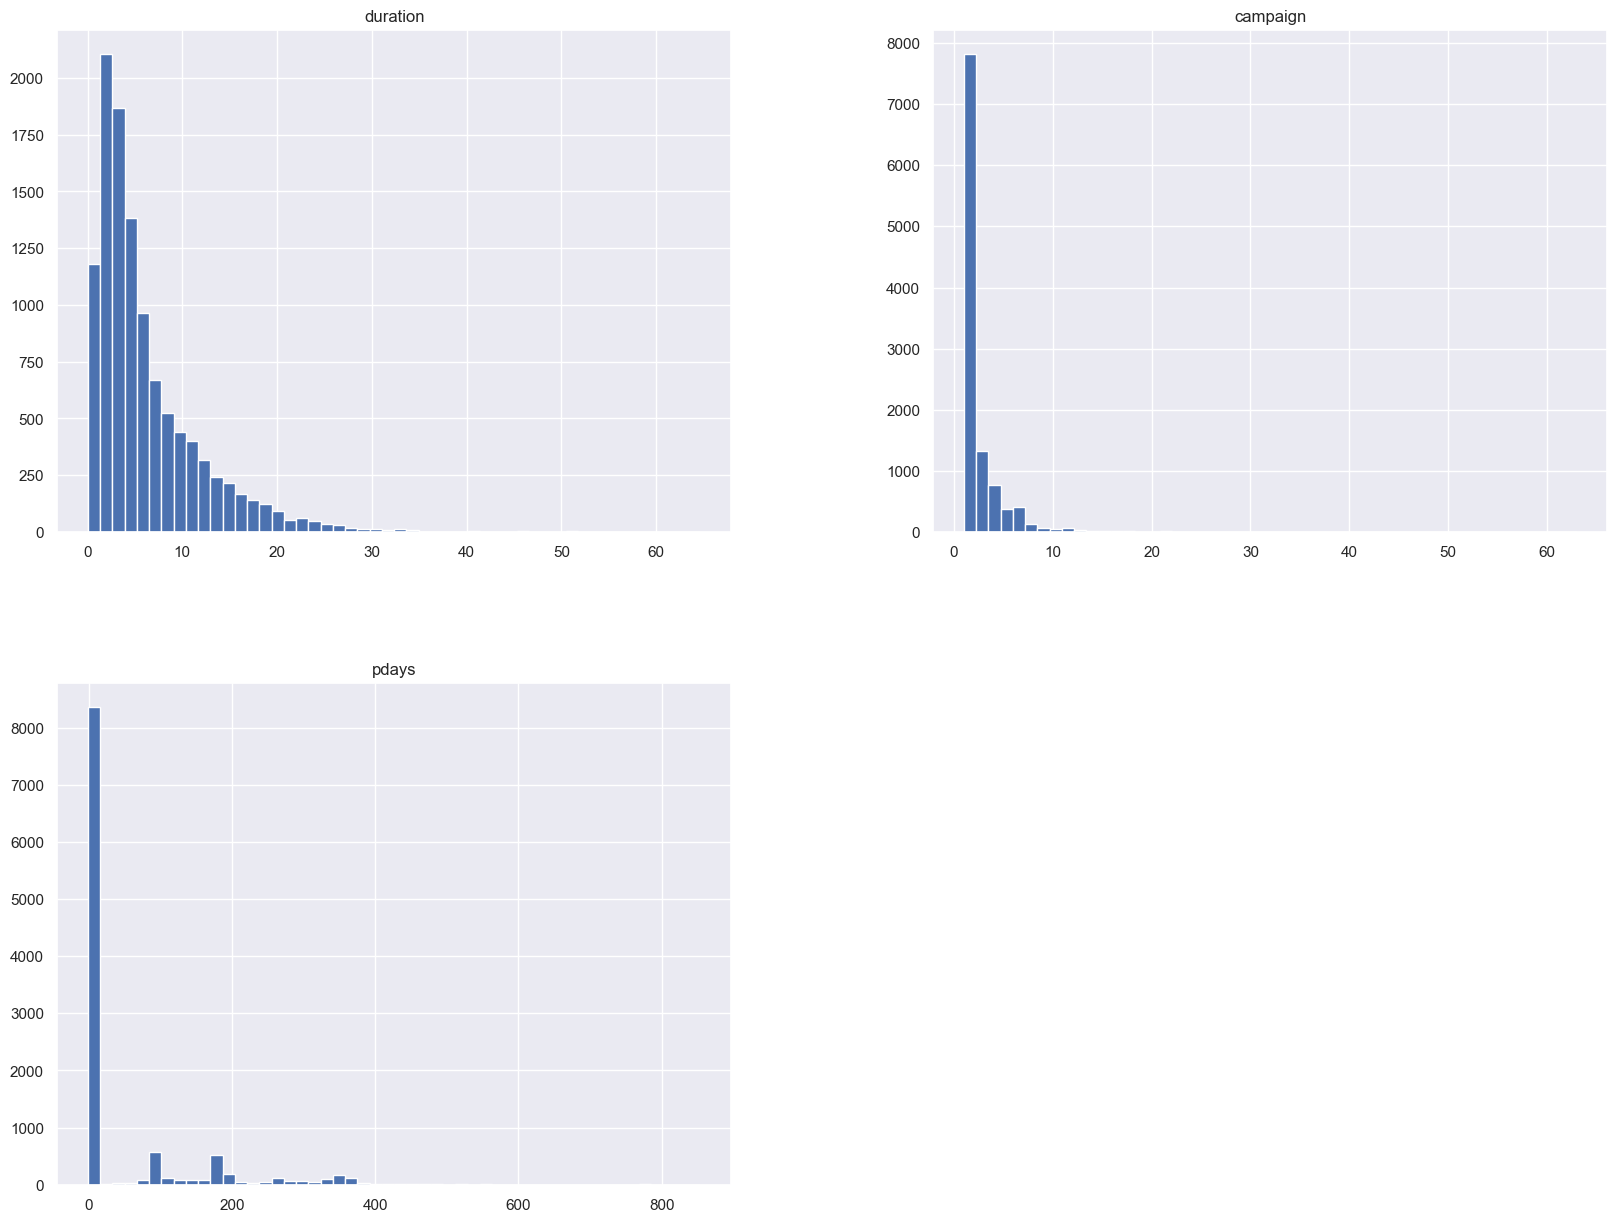

In [26]:
sns.set(style='darkgrid')
remove_outlier = ['duration','campaign', 'pdays']
df[remove_outlier].hist(bins=50, figsize=(20, 15))

plt.show()

In [27]:
df2 = df.copy()

columns_to_process = ['duration', 'campaign', 'pdays']

for column in columns_to_process:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    
    df2.loc[df[column] > upper_limit, column] = upper_limit


- Create upper limits for columns: 'duration', 'campaign', 'pdays' and replace all outliers by that upper limits
- Since the minimum values of those columns are 0, lower limits are not necessary

### Age

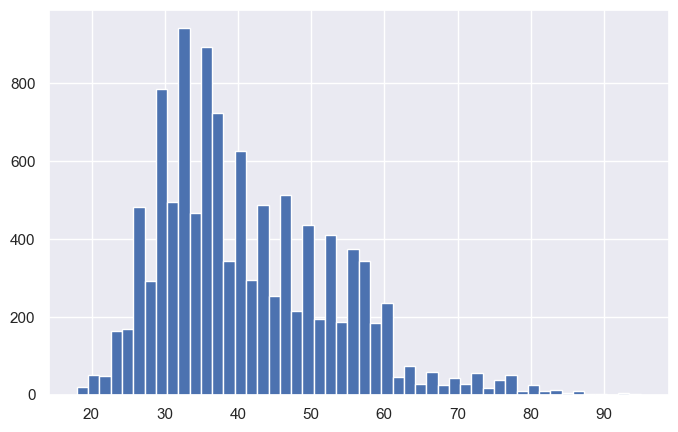

In [28]:
sns.set(style='darkgrid')

plt.figure(figsize=(8, 5))
df["age"].hist(bins=50)

plt.show()

In [29]:
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)
age_iqr = age_q3 - age_q1  
age_upper_limit = age_q3 + (1.5 * age_iqr)
age_lower_limit = age_q1 - (1.5 * age_iqr )

df2.loc[df['age'] > age_upper_limit, 'age'] = age_upper_limit
df2.loc[df['age'] < age_lower_limit, 'age'] = age_lower_limit

create upper limits, lower limits for the columns "age" and replace all outliers by those limits

## Transform data

In [30]:
label_encoder = LabelEncoder()

for i in df2.select_dtypes('object').columns:
    df2[i] = label_encoder.fit_transform(df2[i])

In [31]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343,1,0,2,5,8,17.225,1,-1.000,0,3,1
1,56.0,0,1,1,0,45,0,0,2,5,8,17.225,1,-1.000,0,3,1
2,41.0,9,1,1,0,1270,1,0,2,5,8,17.225,1,-1.000,0,3,1
3,55.0,7,1,1,0,2476,1,0,2,5,8,9.650,1,-1.000,0,3,1
4,54.0,0,1,2,0,184,0,0,2,5,8,11.220,2,-1.000,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,2,0,0,1,1,0,0,20,0,4.280,1,-1.000,0,3,0
11158,39.0,7,1,1,0,733,0,0,2,16,6,1.380,4,-1.000,0,3,0
11159,32.0,9,2,1,0,29,0,0,0,19,1,2.600,2,-1.000,0,3,0
11160,43.0,9,1,1,0,0,0,1,0,8,8,0.150,2,53.375,5,0,0


Use LabelEncoder to convert all categorical variables into numerical values

In [32]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [33]:
x = df2.drop('deposit',axis =1)

In [34]:
y=df2["deposit"]

Drop the columns "deposit" as it is the target to predict in Machine Learning

In [35]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59.0,0,1,1,0,2343,1,0,2,5,8,17.225,1,-1.000,0,3
1,56.0,0,1,1,0,45,0,0,2,5,8,17.225,1,-1.000,0,3
2,41.0,9,1,1,0,1270,1,0,2,5,8,17.225,1,-1.000,0,3
3,55.0,7,1,1,0,2476,1,0,2,5,8,9.650,1,-1.000,0,3
4,54.0,0,1,2,0,184,0,0,2,5,8,11.220,2,-1.000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,2,0,0,1,1,0,0,20,0,4.280,1,-1.000,0,3
11158,39.0,7,1,1,0,733,0,0,2,16,6,1.380,4,-1.000,0,3
11159,32.0,9,2,1,0,29,0,0,0,19,1,2.600,2,-1.000,0,3
11160,43.0,9,1,1,0,0,0,1,0,8,8,0.150,2,53.375,5,0


In [36]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

In [37]:
columns_to_scale = ["age", "pdays", "balance", "day", "duration", "campaign", "previous"]

st = StandardScaler()

for column in columns_to_scale:
    x[column] = st.fit_transform(x[[column]])

In [38]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.530858,0,1,1,0,0.252525,1,0,2,-1.265746,8,2.389719,-0.814270,-0.578658,-0.363260,3
1,1.273537,0,1,1,0,-0.459974,0,0,2,-1.265746,8,2.389719,-0.814270,-0.578658,-0.363260,3
2,-0.013067,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.389719,-0.814270,-0.578658,-0.363260,3
3,1.187764,7,1,1,0,0.293762,1,0,2,-1.265746,8,0.793696,-0.814270,-0.578658,-0.363260,3
4,1.101990,0,1,2,0,-0.416876,0,0,2,-1.265746,8,1.124489,-0.156846,-0.578658,-0.363260,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.699257,1,2,0,0,-0.473616,1,0,0,0.515650,0,-0.337742,-0.814270,-0.578658,-0.363260,3
11158,-0.184615,7,1,1,0,-0.246658,0,0,2,0.040612,6,-0.948761,1.158001,-0.578658,-0.363260,3
11159,-0.785030,9,2,1,0,-0.464934,0,0,0,0.396891,1,-0.691712,-0.156846,-0.578658,-0.363260,3
11160,0.158480,9,1,1,0,-0.473926,0,1,0,-0.909466,8,-1.207917,-0.156846,1.738589,1.818332,0


Use StandardScaler to standardize all numerical columns so that they have mean of 0 and a standard deviation of 1. Making machine learning algorithms more accurate

# Machine Learning

In [39]:
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.2 ,random_state= 42)

In [40]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(11162, 16)
(8929, 16)
(2233, 16)


Split data set into train set and test set for machine learning. Train set account for 80% while test set present the other 20%

In [41]:
logis_reg = LogisticRegression(random_state = 42,  max_iter=1000)
logis_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Use Logistic Regression for machine learning

In [42]:
predictions = logis_reg.predict(x_test)

Make prediction

In [43]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

Using accuracy score, precision score and mean square error to evaluate the machine learning model

- Accuracy score measure of how well the model predicts the correct labels. It calculates the proportion of correctly classified instances out of total instances. The accuracy score is calculated by dividing the number of correct predictions by the total number of predictions.
- Precision score measures the proportion of true positive predictions out of the total positive predictions made by the model. It evaluates how well a model performs in correctly identifying positive instances. Precision is calculated by dividing the number of true positives by the sum of true positives and false positives.
- Mean squared error (MSE) measures the average squared difference between the predicted and actual values. It provides an indication of how well a model's predictions match the true values. MSE is calculated by taking the average of the squared differences between predictions and actual values.

In [44]:
predict_eva = pd.DataFrame([precision, accuracy, mse]).transpose()
predict_eva.columns = [ 'precision','accuracy', 'mse']
predict_eva

,precision,accuracy,mse
0,0.802383,0.794895,0.205105


Print the evaluation result

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Use Random Forest Classifier for machine learning

In [46]:
predictions_2 = rf.predict(x_test)

Make prediction

In [47]:
accuracy_2 = accuracy_score(y_test, predictions_2)
precision_2 = precision_score(y_test,predictions_2)
mse_2 = mean_squared_error(y_test, predictions_2)

Using accuracy score, precision score and mean square error to evaluate the machine learning model

In [48]:
predict_eva_2 = pd.DataFrame([precision_2, accuracy_2, mse_2]).transpose()
predict_eva_2.columns = [ 'precision','accuracy','mse']
predict_eva_2

,precision,accuracy,mse
0,0.808889,0.833408,0.166592


Print the evaluation result

In [49]:
overal_evaluation = pd.concat([predict_eva, predict_eva_2], axis=0)
overal_evaluation.index = ['Logistic Regression', 'Random Forest Classifier']
overal_evaluation

,precision,accuracy,mse
Logistic Regression,0.802383,0.794895,0.205105
Random Forest Classifier,0.808889,0.833408,0.166592


Complie the evaluation result of the two models

# Conclusion

In conclusion, the Logistic Regression and Random Forest Classifier models have shown promising results in predicting customer deposits with an accuracy of approximately 80%. These models can be further explored and fine-tuned to enhance their performance and potentially inform marketing strategies, customer targeting, and resource allocation in the banking industry. However, additional analysis, validation on unseen data, and further improvements are essential to ensure the robustness and generalizability of the models